In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Data Pre-processing

In [2]:
#load in data
heart_stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
heart_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#checking for any null values
heart_stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#looking over positive/negative classes
heart_stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
heart_stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#drop null rows
heart_stroke_df = heart_stroke_df.dropna()
heart_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
#drop id and stroke columns:
strokeY = heart_stroke_df['stroke']
heart_stroke_df.drop(columns=['id', 'stroke'], axis=1, inplace=True)
heart_stroke_df.head()

/Users/garvinmo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [9]:
heart_stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [10]:
categoric_features = ["gender", "work_type", "Residence_type", "ever_married", "smoking_status"]
numeric_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

#one hot encoder and scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

#scaling numeric columns
scaled_columns = pd.DataFrame(scaler.fit_transform(heart_stroke_df[numeric_features]), 
                                columns=numeric_features, 
                                index=heart_stroke_df.index)
encoded_columns = ohe.fit_transform(heart_stroke_df[categoric_features])#turns to dense matrix

# Concatenate them back together
for index, category in enumerate(np.concatenate(ohe.categories_)):
    scaled_columns[category] = encoded_columns[:, index]
    
scaled_columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,No,Yes,Unknown,formerly smoked,never smoked,smokes
0,1.070138,-0.318067,4.381968,2.777698,0.981345,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.646563,-0.318067,4.381968,0.013842,0.459269,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.272012,-0.318067,-0.228208,1.484132,0.701207,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.602222,3.143994,-0.228208,1.549193,-0.623083,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1.690903,-0.318067,-0.228208,1.821368,0.013595,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324241,-0.318067,-0.228208,-0.050094,-1.310695,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5106,1.690903,-0.318067,-0.228208,0.447882,1.414286,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,-0.348753,-0.318067,-0.228208,-0.502369,0.217332,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5108,0.360692,-0.318067,-0.228208,1.372920,-0.419346,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_columns)
x_pca = pca.transform(scaled_columns)

In [12]:
pca.explained_variance_ratio_

array([0.26601215, 0.13067098])

# PCA Algorithm

In [13]:
#set predictor column
# strokeY = strokeY.replace(1, "stroke")
# strokeY = strokeY.replace(0, "no stroke")
strokeY

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

Text(0, 0.5, 'Second Principal Component')

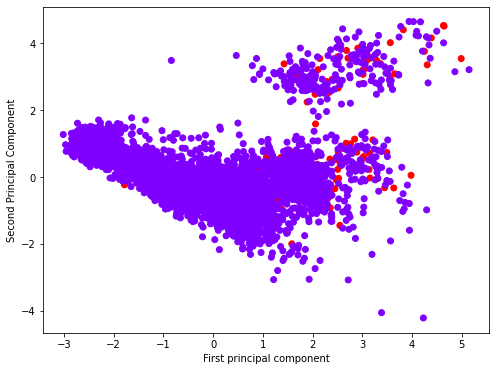

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=strokeY,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
#assign features and get the covariance matrix
feat = scaled_columns.T
covMatrix = np.cov(feat)
covMatrix

In [ ]:
#perform eigendecomposition
eigvalues, eigvectors = np.linalg.eig(covMatrix)

In [ ]:
#view vectors
eigvectors

In [ ]:
#check variances to make sure they equal one and find the two that have the most impact
variances = []
for i in range(len(eigvalues)):
    variances.append(eigvalues[i] / np.sum(eigvalues))
 
print(np.sum(variances), "\n", variances)

In [ ]:
#assign the two principal components and the target variable (stroke)
PCA1 = scaled_columns.dot(eigvectors.T[0])
PCA2 = scaled_columns.dot(eigvectors.T[1])
res = pd.DataFrame(PCA1, columns=["PCA1"])
res["PCA2"] = PCA2
res["Y"] = strokeY
res.head()

In [ ]:
#graph in one dimension as a line
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(res["PCA1"], [0] * len(res), hue=res["Y"])

In [ ]:
#graph in 2 dimensional space
sns.scatterplot(res["PCA1"], res["PCA2"], hue=res["Y"])

# Pre-PCA and Post-PCA Data Comparison
In this section, we will run several supervised machine learning algorithms and analyze the effects of PCA dimension deduction on our dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics
import time

In [ ]:
res1 = res.replace(['stroke', 'no stroke'], [1, 0]).apply(np.real)

In [ ]:
# Seperate the dataset into train and test set
X_noPCA = heart_stroke_df.drop(columns=['stroke'])
y_noPCA = heart_stroke_df['stroke']
X_PCA = res1.drop(columns=['Y'])
y_PCA = res1['Y']

X_noPCA_train, X_noPCA_test, y_noPCA_train, y_noPCA_test = train_test_split(X_noPCA, y_noPCA, test_size = 0.35)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y_PCA, test_size = 0.35)

## Logistic Regression

In [ ]:
clf = LogisticRegression().fit(X_noPCA_train, y_noPCA_train)
y_noPCA_pred = clf.predict(X_noPCA_test)

In [ ]:
# Accuracy score for pre-PCA data
print(metrics.accuracy_score(y_noPCA_test,y_noPCA_pred))

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_PCA_train, y_PCA_train)
y_PCA_pred = clf.predict(X_PCA_test)

# Accuracy score for post-PCA data
print(metrics.accuracy_score(y_PCA_test,y_PCA_pred))

## Decision Trees

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_noPCA_train, y_noPCA_train)

y_noPCA_pred = clf.predict(X_noPCA_test)

# Accuracy score for pre-PCA data
print(metrics.accuracy_score(y_noPCA_test,y_noPCA_pred))

In [ ]:
clf = clf.fit(X_PCA_train, y_PCA_train)

y_PCA_pred = clf.predict(X_PCA_test)

# Accuracy score for post-PCA data
print(metrics.accuracy_score(y_PCA_test,y_PCA_pred))

## Linear SVM

In [ ]:
svclassifier = SVC(kernel='linear')

In [ ]:
start_time = time.time()
svclassifier.fit(X_noPCA_train, y_noPCA_train)

y_noPCA_pred = svclassifier.predict(X_noPCA_test)

# Accuracy score for pre-PCA data
print(metrics.accuracy_score(y_noPCA_test,y_noPCA_pred))
print("Running time: %s seconds " % (time.time() - start_time))

In [ ]:
start_time = time.time()
svclassifier.fit(X_PCA_train, y_PCA_train)

y_PCA_pred = svclassifier.predict(X_PCA_test)

# Accuracy score for post-PCA data
print(metrics.accuracy_score(y_PCA_test,y_PCA_pred))
print("Running time: %s seconds " % (time.time() - start_time))

## Analysis
After running 3 different supervised machie learning algorithms with the pre-PCA and post-PCA data, from the accuracy scores, we observe that: for this particular dataset, Logistic Regression and Linear SVM does a slightly better job with pre-PCA data. For Decision Trees, the pre and post PCA data performance are very close, with post PCA slightly better. 
In the Linear SVM section, we timed the programming running time for our model. Notice that the running time for post-PCA data is much less than the pre-PCA data since we reduce the dimensionality of the dataset from 20 to 2. From above observations, we see that PCA can help us save computational cost significantly while not sacrificing much classification error.